In [1]:
import numpy as np, analysis as ana, prjlib, plottools as pl
from matplotlib.pyplot import *

In [2]:
Lmin=20
mb, __, __ = prjlib.binning_all(10,lmin=Lmin,Lsp=2048)
p, __ = prjlib.filename_init(PSA='s14&15_cross',stype='lcmb',doreal='True',rlmin='200')
ocb = prjlib.binned_cl(p.quad.f['EB'].ocls,mb)
scb = prjlib.binned_cl_rlz(p.quad.f['EB'].cl,0,200,mb)
mcb = np.mean(scb,axis=0)
vcb = np.std(scb,axis=0)

In [3]:
st = ana.PTEs(ocb,scb)

0.6 0.5 7.3 0.7


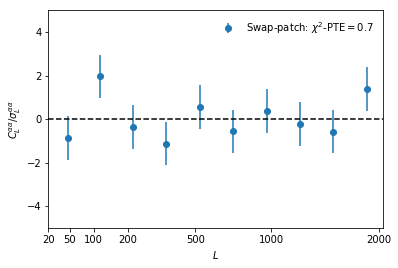

In [4]:
pl.plot_1dstyle(frac=True,spc='p2',ylab=r'$C_L^{\alpha\alpha}/\sigma_L^{\alpha\alpha}$',xmin=Lmin)
Label = r'Swap-patch: $\chi^2$-PTE$='+str(st.px2)[:4]+'$'
errorbar(np.sqrt(mb.bc),(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label=Label)
legend(loc=0,frameon=False)
savefig('fig_cross.png')

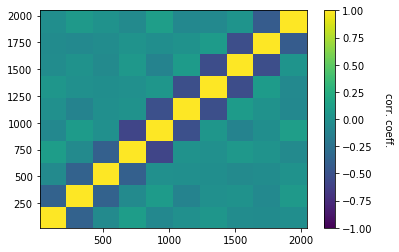

In [5]:
pl.plot_corr(scb,Lmin,2048,clab='corr. coeff.')